In [2]:
##
## Preparación
##
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [219]:
list(pd.read_excel('files/MUERTOS.xlsx',sheets[1]).columns[:])

['Orden',
 'Fecha Ocurrencia',
 'Hora Ocurrencia',
 'Fecha Levantamiento',
 'Spoa',
 'Expediente',
 'Clase',
 'Grupo',
 'Direccion Ocurrencia',
 'Municipio',
 'Lugar de Inspección',
 'Victima_Nombre',
 'Victima_Apellido',
 'Identificacion',
 'Sexo',
 'Años',
 'Condicion',
 'Vehículo Víctima o vehículo que atropella',
 'Placa',
 'Servicio',
 'Empresa',
 'Embriaguez ']

In [46]:
import openpyxl
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
excel_document = openpyxl.load_workbook('files/MUERTOS.xlsx')
sheets=excel_document.get_sheet_names()
#sheets.reverse()
list(pd.read_excel('files/MUERTOS.xlsx',sheets[1]).columns[:])
df5=pd.DataFrame(columns=list(pd.read_excel('files/MUERTOS.xlsx',sheets[1]).columns[:]))
for x in range(len(excel_document.get_sheet_names())):
    df5=pd.concat([df5, pd.read_excel('files/MUERTOS.xlsx',sheets[x], parse_dates=['Fecha Ocurrencia'], index=True)])
    df5.index=list(range(len(df5['Fecha Ocurrencia'])))
#def DAYNAME(s):
    #return datetime.datetime.strptime(s, '%Y-%m-%d %H').strftime('%A')
#df5['Fecha y Hora Ocurrencia']=df5['Fecha Ocurrencia'].map(lambda x: str(x)[0:10]) +' ' + df5['Hora Ocurrencia'].map(lambda x: str(x)[0:2])
##los valores de fecha y hora deberan de manejarse como campos independiente, pues existen registros de hora sin información
df5=pd.DataFrame({'Fecha Ocurrencia':df5['Fecha Ocurrencia'],
                 'Hora Ocurrencia':df5['Hora Ocurrencia'],
                 'Edad Víctima':df5['Años'],
                 'Sexo':df5['Sexo'],
                 'Clase de Accidente':df5['Clase'],
                 'Condición Víctima':df5['Condicion'],
                 'Vehículo Víctima o vehículo que atropella':df5['Vehículo Víctima o vehículo que atropella'],
                 'Dirección Ocurrencia':df5['Direccion Ocurrencia'],
                 'Prueba Embriaguez':df5['Embriaguez '],
                 'Empresa Servicio Público':df5['Empresa'],
                 'Fecha Levantamiento':df5['Fecha Levantamiento'],
                 'Lugar de Inspección':df5['Lugar de Inspección'],
                 'Servicio Publico o Particular':df5['Servicio'],
                 'Muertes':df5['Fecha Ocurrencia'].replace(df5['Fecha Ocurrencia'], 1)})
for x in range(len(list(df5.axes[1]))):
    for y in range(len(df5)):
        if df5[df5.columns[x]][y] == 'Sin inf.' or df5[df5.columns[x]][y] == 'No Reporta' or df5[df5.columns[x]][y] == 'NR'or df5[df5.columns[x]][y] == 'Sin Inf' or df5[df5.columns[x]][y] == 'Sin inf' or df5[df5.columns[x]][y] == 'sin inf' or df5[df5.columns[x]][y] == 'No reporta' or df5[df5.columns[x]][y] == 'N-R':
            df5[df5.columns[x]][y] = np.NaN
for y in range(len(df5)):
        if df5['Clase de Accidente'][y] == 'Caida Ocupante' or df5['Clase de Accidente'][y] == 'Caída de Ocupante'or df5['Clase de Accidente'][y] == 'caida ocupante':
            df5['Clase de Accidente'][y] = 'Caída Ocupante'
for y in range(len(df5)):
        if df5['Clase de Accidente'][y] == 'atropello':
            df5['Clase de Accidente'][y] = 'Atropello'
for y in range(len(df5)):
        if df5['Clase de Accidente'][y] == 'Otros' or df5['Clase de Accidente'][y] == 'Otro':
            df5['Clase de Accidente'][y] = 'Otra' 
for y in range(len(df5)):
        if df5['Clase de Accidente'][y] == 'choque' or df5['Clase de Accidente'][y] == 'Choque ':
            df5['Clase de Accidente'][y] = 'Choque'
for y in range(len(df5)):
        if df5['Condición Víctima'][y] == 'Conductor Auto' or df5['Condición Víctima'][y] == 'Conductor Camioneta' or df5['Condición Víctima'][y] =='Conductor Campero' or df5['Condición Víctima'][y] == 'Conductor Furgon':
            df5['Condición Víctima'][y] = 'Conductor'
for y in range(len(df5)):
        if df5['Condición Víctima'][y] == 'Pasajero Auto' or df5['Condición Víctima'][y] == 'Pasajero Bus' or df5['Condición Víctima'][y] =='Pasajero Buseta' or df5['Condición Víctima'][y] == 'Pasajero Microbus':
            df5['Condición Víctima'][y] = 'Pasajero'            
for y in range(len(df5)):
        if df5['Condición Víctima'][y] == 'Pasajero Moto':
            df5['Condición Víctima'][y] = 'Parrillero'             
for y in range(len(df5)):
        if df5['Condición Víctima'][y] == 'Acompañante':
            df5['Condición Víctima'][y] = 'Pasajero'
for y in range(len(df5)):
        if df5['Condición Víctima'][y] == 'Peatón (Silla de Ruedas)':
            df5['Condición Víctima'][y] = 'Peatón'
for y in range(len(df5)):
        if df5['Vehículo Víctima o vehículo que atropella'][y] == 'CAMION' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Camion' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Camion ' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Camión Recolector' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Furgón':
            df5['Vehículo Víctima o vehículo que atropella'][y] = 'Camión'
for y in range(len(df5)):
        if df5['Vehículo Víctima o vehículo que atropella'][y] == 'Auto' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Automovil' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'AutomóviL' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Campero' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Vehículo' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Camioneta Furgón' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Camioneta':
            df5['Vehículo Víctima o vehículo que atropella'][y] = 'Automóvil'           
for y in range(len(df5)):
        if df5['Vehículo Víctima o vehículo que atropella'][y] == 'Tracto Camion' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Tracto Mula' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Tracto camion' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Tracto-Camión' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Tractocamion' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Tracto Camión':
            df5['Vehículo Víctima o vehículo que atropella'][y] = 'Tractocamión'
for y in range(len(df5)):
        if df5['Vehículo Víctima o vehículo que atropella'][y] == 'BUS' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Bus Escalera' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Bus (padrón)' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Bus Articulado' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Bus Escalera' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Escalera' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Buseta':
            df5['Vehículo Víctima o vehículo que atropella'][y] = 'Bus'
for y in range(len(df5)):
        if df5['Vehículo Víctima o vehículo que atropella'][y] == 'Bicicleta ':
            df5['Vehículo Víctima o vehículo que atropella'][y] = 'Bicicleta'
for y in range(len(df5)):
        if df5['Vehículo Víctima o vehículo que atropella'][y] == 'Moto' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Triciclo' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'Cuatrimoto':
            df5['Vehículo Víctima o vehículo que atropella'][y] = 'Motocicleta'           
for y in range(len(df5)):
        if df5['Vehículo Víctima o vehículo que atropella'][y] == 'N.N' or df5['Vehículo Víctima o vehículo que atropella'][y] == 'NN':
            df5['Vehículo Víctima o vehículo que atropella'][y] = 'N.N.'            
for y in range(len(df5)):
        if df5['Vehículo Víctima o vehículo que atropella'][y] == 'Microbús':
            df5['Vehículo Víctima o vehículo que atropella'][y] = 'Microbus'            
for y in range(len(df5)):
        if df5['Vehículo Víctima o vehículo que atropella'][y] == 'Motocarga':
            df5['Vehículo Víctima o vehículo que atropella'][y] = 'Motocarro'
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '20 - 29':
            df5['Edad Víctima'][y] = 24 
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '20-25':
            df5['Edad Víctima'][y] = 22            
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '20-29':
            df5['Edad Víctima'][y] = 24
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '25-30':
            df5['Edad Víctima'][y] = 27           
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '30 - 39':
            df5['Edad Víctima'][y] = 34           
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '30-35':
            df5['Edad Víctima'][y] = 32 
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '35-40':
            df5['Edad Víctima'][y] = 37
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '40-45':
            df5['Edad Víctima'][y] = 42
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '45 - 60':
            df5['Edad Víctima'][y] = 42
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '45-50':
            df5['Edad Víctima'][y] = 47
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '5 meses':
            df5['Edad Víctima'][y] = 0
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '50 - 55':
            df5['Edad Víctima'][y] = 52
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '50-55':
            df5['Edad Víctima'][y] = 52
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '55-60':
            df5['Edad Víctima'][y] = 57
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '6 meses':
            df5['Edad Víctima'][y] = 0
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '60 - 65':
            df5['Edad Víctima'][y] = 62
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '60-65':
            df5['Edad Víctima'][y] = 62
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '65 a 70':
            df5['Edad Víctima'][y] = 67
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '65-70':
            df5['Edad Víctima'][y] = 67
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '70 - 79':
            df5['Edad Víctima'][y] = 74
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '70-75':
            df5['Edad Víctima'][y] = 72
for y in range(len(df5)):
        if df5['Edad Víctima'][y] == '80 - 85':
            df5['Edad Víctima'][y] = 82
df5['Rango de Edades'] = pd.cut(df5['Edad Víctima'],range(0, 105, 5), right=False, labels = ["{0} - {1}".format(i, i + 5) for i in range(0, 100, 5)]) 
df5

C:\Users\Paolo Camacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  if __name__ == '__main__':
C:\Users\Paolo Camacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  del sys.path[0]
C:\Users\Paolo Camacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
C:\Users\Paolo Camacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Paolo Camacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Paolo Camacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Paolo Camacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Paolo Camacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:126: SettingWithCopyWarning: 
A value is trying to 

,Fecha Ocurrencia,Hora Ocurrencia,Edad Víctima,Sexo,Clase de Accidente,Condición Víctima,Vehículo Víctima o vehículo que atropella,Dirección Ocurrencia,Prueba Embriaguez,Empresa Servicio Público,Fecha Levantamiento,Lugar de Inspección,Servicio Publico o Particular,Muertes,Rango de Edades
0,2008-01-01,09:00:00,73,M,Atropello,Peatón,Automóvil,CR 44 CL 84,NaN,NaN,2008-01-01 00:00:00,Policlinica,NaN,1,70 - 75
1,2008-01-02,16:55:00,2,M,Atropello,Peatón,Microbus,CR 25 CL 75C,0Mg%,NaN,2008-01-02 00:00:00,Unidad Intermedia de Manrique,NaN,1,0 - 5
2,2008-01-04,17:30:00,86,M,Atropello,Peatón,Automóvil,CR 78 CL 32B,0Mg%,NaN,2008-01-04 00:00:00,Clinica las Americas,NaN,1,85 - 90
3,2008-01-08,13:30:00,63,M,Atropello,Peatón,Automóvil,CR81 CL 18,0Mg%,NaN,2008-01-08 00:00:00,Clinica las Americas,NaN,1,60 - 65
4,2008-01-09,07:26:00,61,M,Choque,Conductor,Automóvil,CL 12S CR 25,NaN,NaN,2008-01-09 00:00:00,CL 12S CR 25,NaN,1,60 - 65
5,2008-01-11,12:30:00,25,M,Choque,Motociclista,Motocicleta,CR 64C CL 80,NaN,NaN,2008-01-11 00:00:00,CR 64C CL 80,NaN,1,25 - 30
6,2008-01-11,10:30:00,57,F,Atropello,Peatón,Automóvil,CL 25 CR 65F,0Mg%,NaN,2008-01-12 00:00:00,Clinica las Americas,NaN,1,55 - 60
7,2008-01-13,06:25:00,25,M,Choque,Ciclista,Bicicleta,CR 45 CL 71,NaN,NaN,2008-01-13 00:00:00,CR 45 CL 71,NaN,1,25 - 30
8,2008-01-13,07:20:00,30,M,Choque,Motociclista,Motocicleta,CR 64C CL 93,NaN,NaN,2008-01-13 00:00:00,CR 64C CL 93,NaN,1,30 - 35
9,2008-01-17,08:30:00,64,M,Atropello,Peatón,Camión,Via al Tunel la Asomadera,0Mg%,NaN,2008-01-17 00:00:00,Hospital Pablo Tobon Uribe,NaN,1,60 - 65


In [67]:
df5['Hora Ocurrencia'][3]

datetime.time(13, 30)

In [80]:
data=df5.groupby([pd.Grouper(freq='D', key='Fecha Ocurrencia')]).sum().reset_index()
data=data.groupby([data['Fecha Ocurrencia'].dt.year.rename('Año Ocurrencia'), data['Fecha Ocurrencia'].dt.month.rename('Mes Ocurrencia'), data['Fecha Ocurrencia'].dt.dayofweek.rename('Día Ocurrencia')]).sum().reset_index()
data

,Año Ocurrencia,Mes Ocurrencia,Día Ocurrencia,Muertes
0,2008,1,0,0
1,2008,1,1,2
2,2008,1,2,7
3,2008,1,3,4
4,2008,1,4,4
5,2008,1,5,2
6,2008,1,6,5
7,2008,2,0,3
8,2008,2,1,7
9,2008,2,2,2


In [126]:
data.groupby('Año Ocurrencia').sum()['Muertes'].reset_index()

,Año Ocurrencia,Muertes
0,2008,327
1,2009,306
2,2010,295
3,2011,308
4,2012,278
5,2013,308
6,2014,291
7,2015,274
8,2016,272
9,2017,263


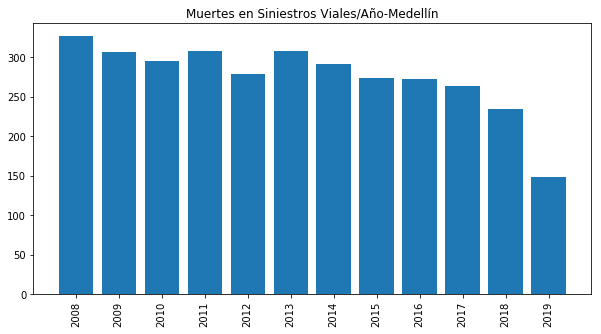

In [127]:
plt.figure(figsize=(10,5))
plt.bar(range(len(data.groupby('Año Ocurrencia').sum().reset_index())), data.groupby('Año Ocurrencia').sum().reset_index()['Muertes'])
plt.xticks(range(len(data.groupby('Año Ocurrencia').sum().reset_index())),list(data.groupby('Año Ocurrencia').groups.keys()),rotation='vertical')
plt.title("Muertes en Siniestros Viales/Año-Medellín");

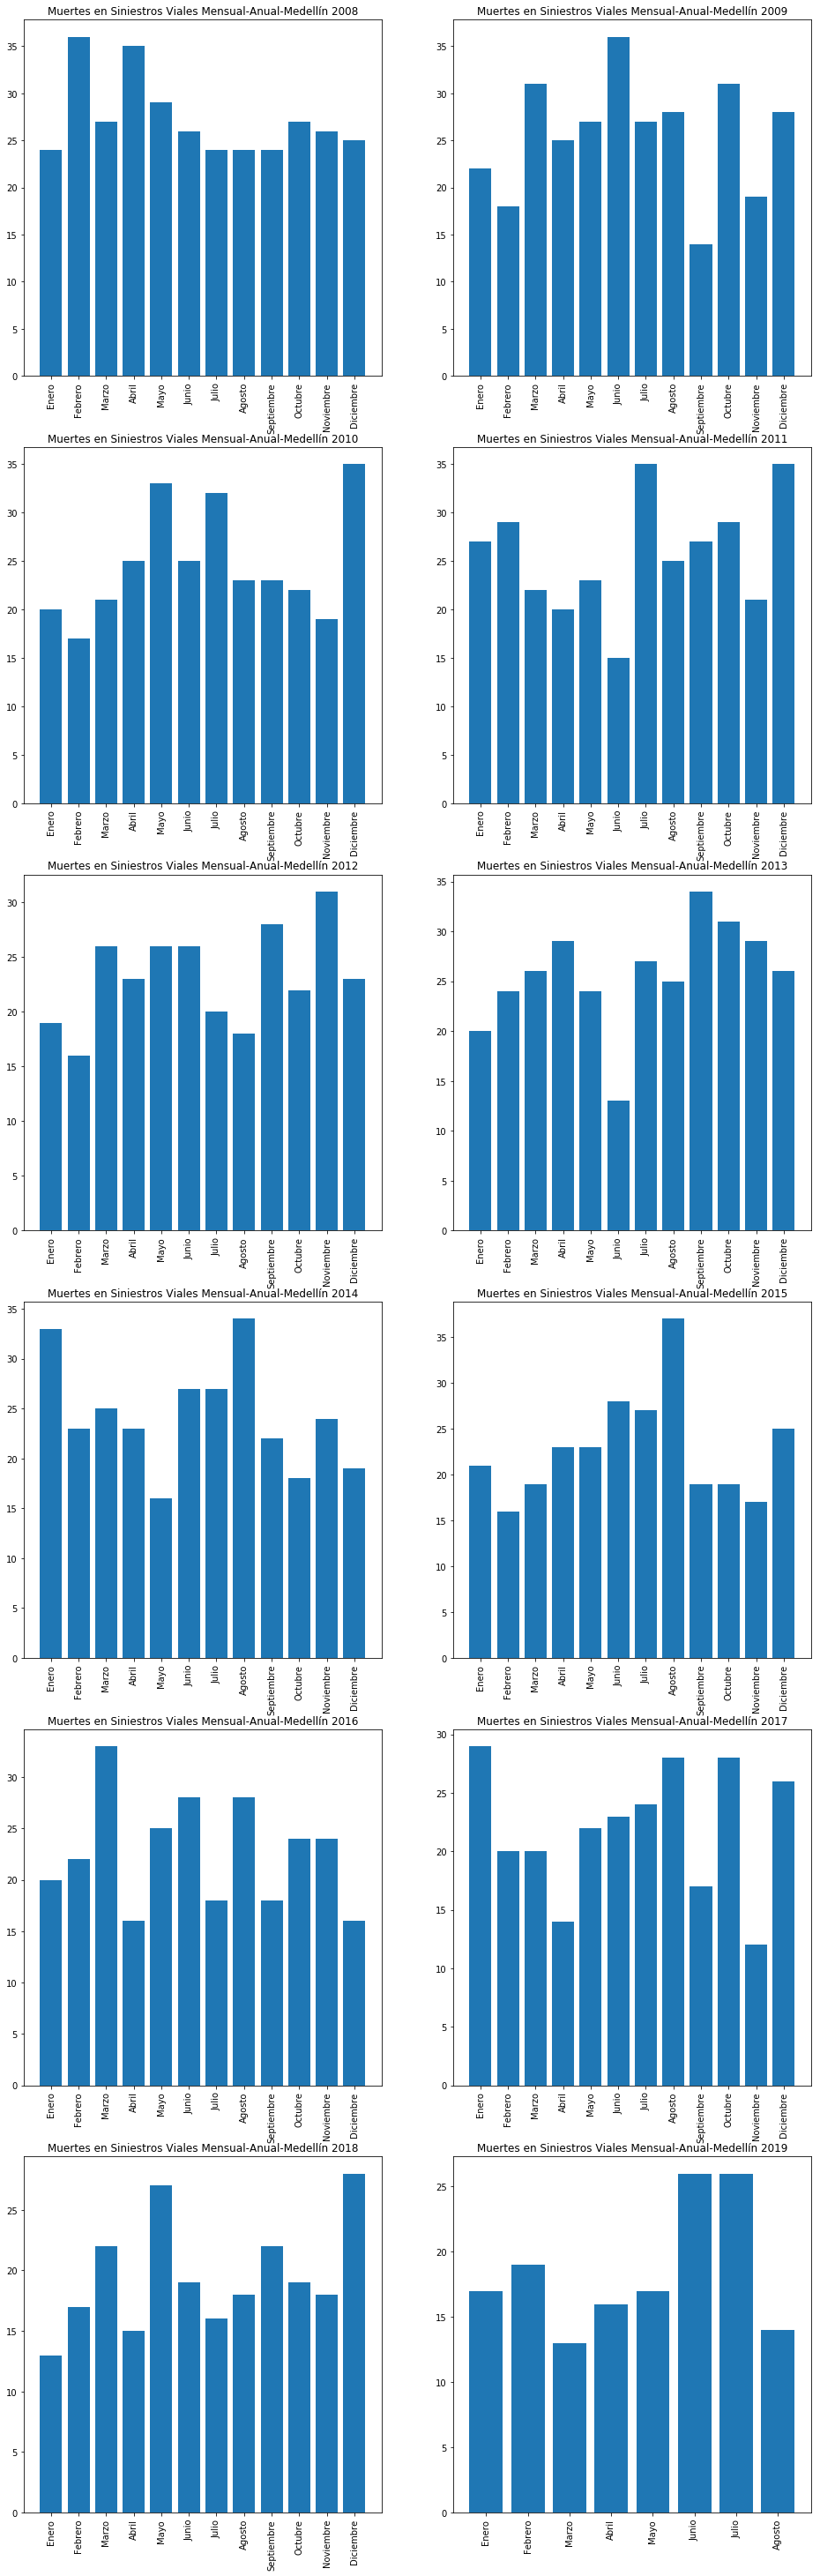

In [123]:
plt.figure(figsize=(16, 52))
for index in range(len(sheets)):
    plt.subplot(len(sheets)/2, 2, index+1)
    y=data.loc[data.groupby('Año Ocurrencia').groups[list(data.groupby(data['Año Ocurrencia']).groups.keys())[index]]]
    plt.bar(range(len(y.groupby('Mes Ocurrencia'))),y.groupby('Mes Ocurrencia').sum()['Muertes'].reset_index()['Muertes'])
    plt.xticks(range(len(y.groupby('Mes Ocurrencia'))),["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"], rotation='vertical')
    plt.title("Muertes en Siniestros Viales Mensual-Anual"+"-"+sheets[index]);

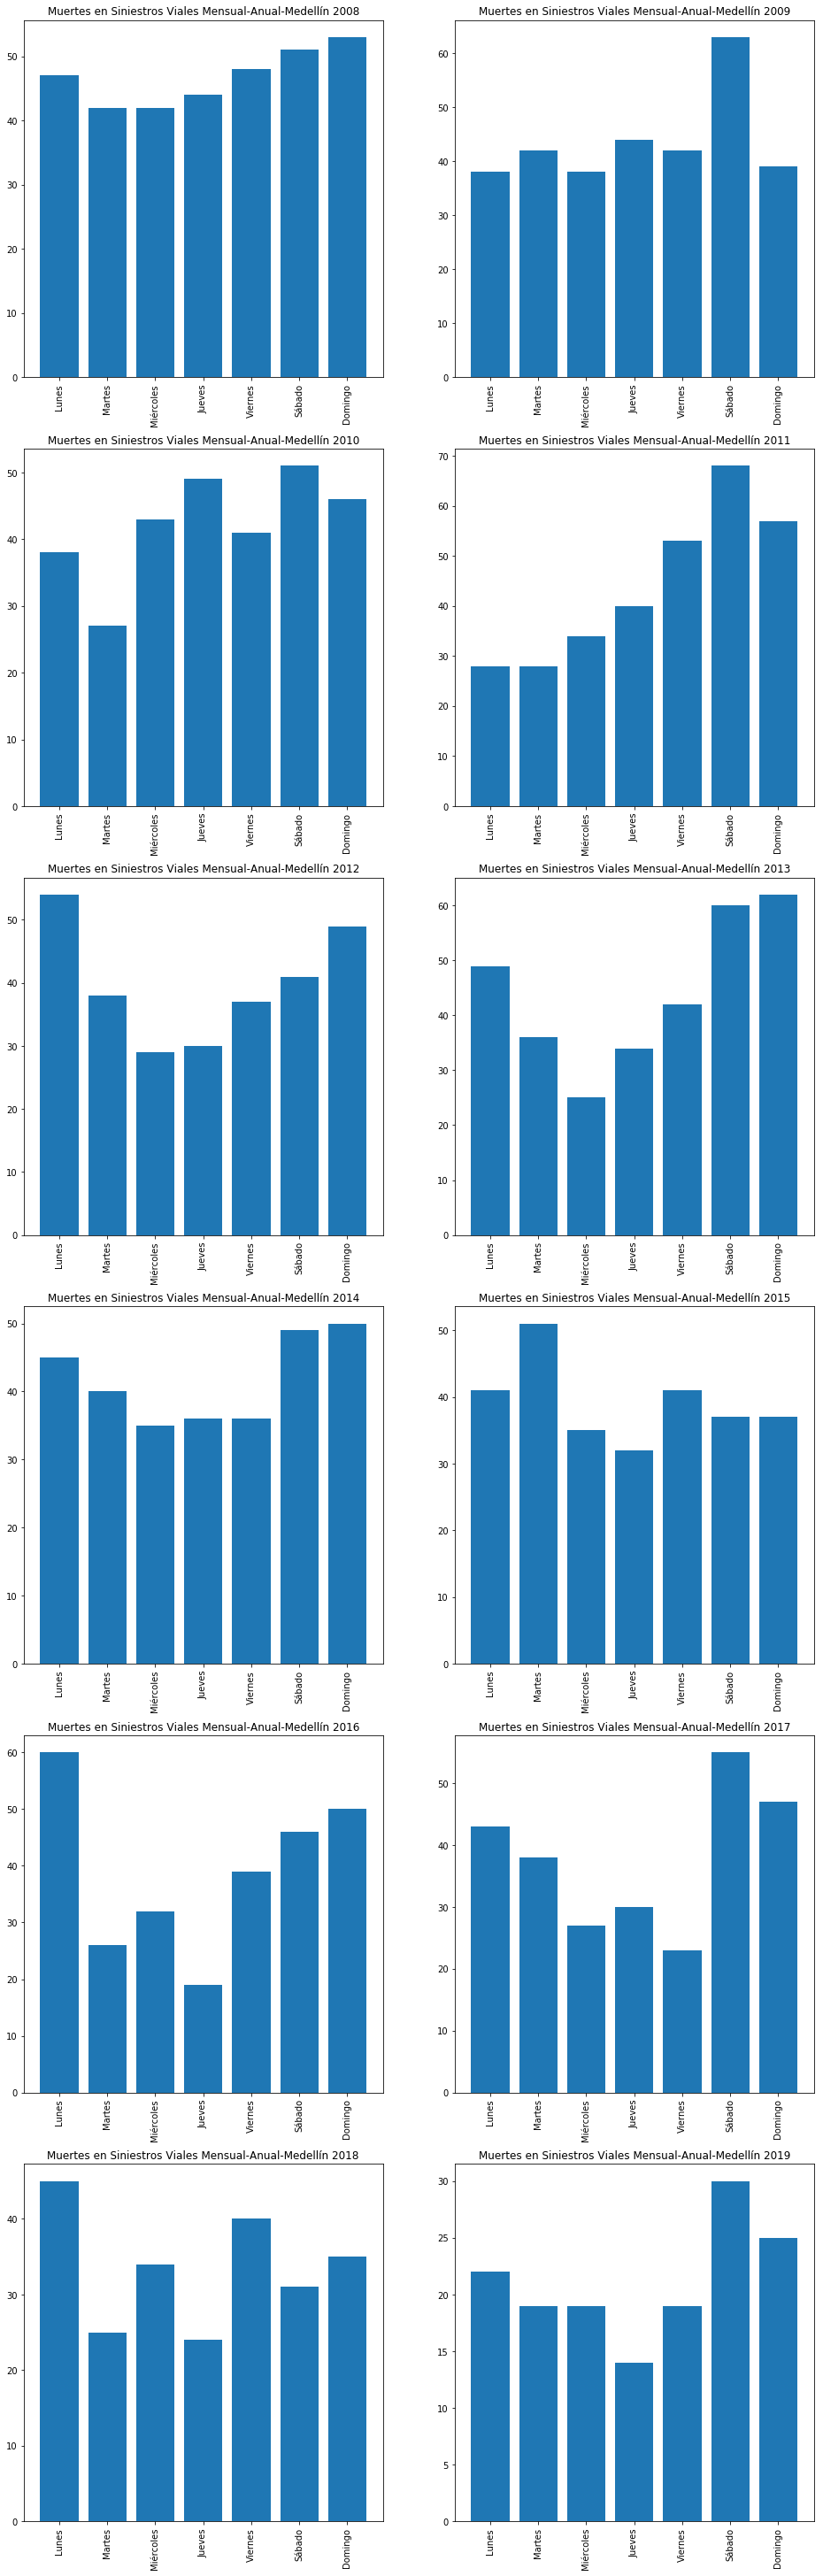

In [125]:
plt.figure(figsize=(16, 52))
for index in range(len(sheets)):
    plt.subplot(len(sheets)/2, 2, index+1)
    y=data.loc[data.groupby('Año Ocurrencia').groups[list(data.groupby(data['Año Ocurrencia']).groups.keys())[index]]]
    plt.bar(range(len(y.groupby('Día Ocurrencia'))),y.groupby('Día Ocurrencia').sum()['Muertes'].reset_index()['Muertes'])
    plt.xticks(range(len(y.groupby('Día Ocurrencia'))),["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"], rotation='vertical')
    plt.title("Muertes en Siniestros Viales Mensual-Anual"+"-"+sheets[index]);